In [2]:
# #!/usr/bin/env python3

import matplotlib.pyplot as plt 
import pandas as pd 
from datetime import datetime
from datetime import timedelta

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/COVID-19%20-%20Johns%20Hopkins%20University.csv')

In [4]:
## converting date counting to actual dates (easier to plot, work with, and understand)	
def date_replace(country_info):

    ## creating a list of actual dates, not just numbers
    date_list = []
    ## choosing start date as 2020/01/22 (January, 22nd, 2020) b/c that's when the OWID data starts
    date = datetime(2020, 1, 22)
    for count in country_info["Year"]:
        date_list.append(date)
        date = date + timedelta(days=1)

    ## creating a list of values to replace
    replace_list = []
    for num in country_info["Year"]:
        replace_list.append(num)

    country_info = country_info.replace({"Year":replace_list}, {"Year":date_list})

    return country_info

In [5]:
def get_cfr_info(country_name):
    country_info = df.loc[df["Country"] == country_name]
    country_info = date_replace(country_info)
    cleaned_data = country_info.iloc[:, [0,1,32]].copy()
    cleaned_data = cleaned_data.dropna()

    dates = cleaned_data["Year"].tolist()
    cfr = cleaned_data.iloc[:, 2].tolist()

    return dates, cfr

In [6]:
def cfr_plot(x, y, country_name):

    months = []
    months.append(get_cfr_info("Switzerland")[0][0])
    for date in get_cfr_info("Switzerland")[0]:
        if date.day == 1:
            if date not in months:
                months.append(date)


    plt.figure(figsize = (15, 8))
    plt.plot(x, y)
    plt.title("{} Case Fatality Ratio (%)".format(country_name), size = 25)
    plt.xlabel("Date", size = 20)
    plt.ylabel("CFR (%)", size = 20)
    plt.yticks(size = 10)
    plt.xticks(months, size = 10)
    plt.show()

In [10]:
def cfr_visualization(country_name):
    dates = get_cfr_info(country_name)[0]
    cfr = get_cfr_info(country_name)[1]

    cfr_plot(dates, cfr, country_name)

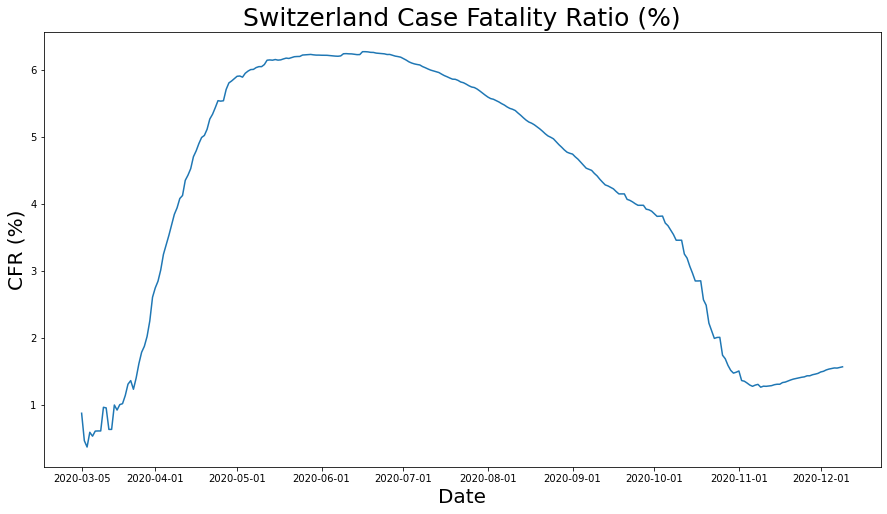

In [11]:
cfr_visualization("Switzerland")